# Predicting King County House Prices
## Method
##### We created 4 new features in order to better predict the housing prices of King County. By mapping out the housing prices with the latitude and longitude coordinates, a city center was found to be in Seattle. All houses further from this point seemed to decrease in price, so the feature of "distance_km" was created. The second feature was changed from a discrete variable to a categorical variable, dividing the grades into a low grade or high grade. Similarly, using the yr_renovated column, I created a new feature of renovated home and non-renovated homes. Finally, the last feature was calculated by dividing sqft_living by floors. 

###### These and most of the other features were used to create a model. The coeffecients of each variable were produced using a lasso model at the bottom of this notebook. The standard error is about $185,998.43. 

In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [2]:
df = pd.read_csv('kc_housing_data_for_feat_engineering_lab.csv')

In [6]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [7]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old,year_sold,since_sold,price_log
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,62,2014,3,12.309982
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,66,2014,3,13.195614
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,84,2015,2,12.100712
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,52,2014,3,13.311329
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,30,2015,2,13.142166


In [8]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old,year_sold,since_sold,price_log
count,2.160000e+04,2.160000e+04,21600.000000,21600.000000,21600.000000,2.160000e+04,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000,21600.000000
mean,4.579615e+09,5.373816e+05,3.368519,2.112755,2076.363102,1.509984e+04,1.494074,0.007315,0.233102,3.409491,7.654398,1785.811019,290.552083,1970.997083,84.175417,98077.958565,47.560010,-122.213881,1985.546713,12763.966296,46.002917,2014.323009,2.676991,13.046450
std,2.876428e+09,3.478161e+05,0.907209,0.764996,905.418691,4.143112e+04,0.539977,0.085215,0.763639,0.650764,1.170914,820.347147,439.822696,29.371050,401.161832,53.504611,0.138589,0.140865,684.040784,27310.813034,29.371050,0.467637,0.467637,0.523683
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2.000000,2014.000000,2.000000,11.225243
25%,2.123049e+09,3.213818e+05,3.000000,1.750000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470775,-122.328000,1490.000000,5100.000000,20.000000,2014.000000,2.000000,12.680385
50%,3.904926e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.615500e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571750,-122.231000,1840.000000,7620.000000,42.000000,2014.000000,3.000000,13.017003
75%,7.308675e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.066675e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10080.000000,66.000000,2015.000000,3.000000,13.377006
max,9.900000e+09,3.850000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,117.000000,2015.000000,3.000000,15.163584


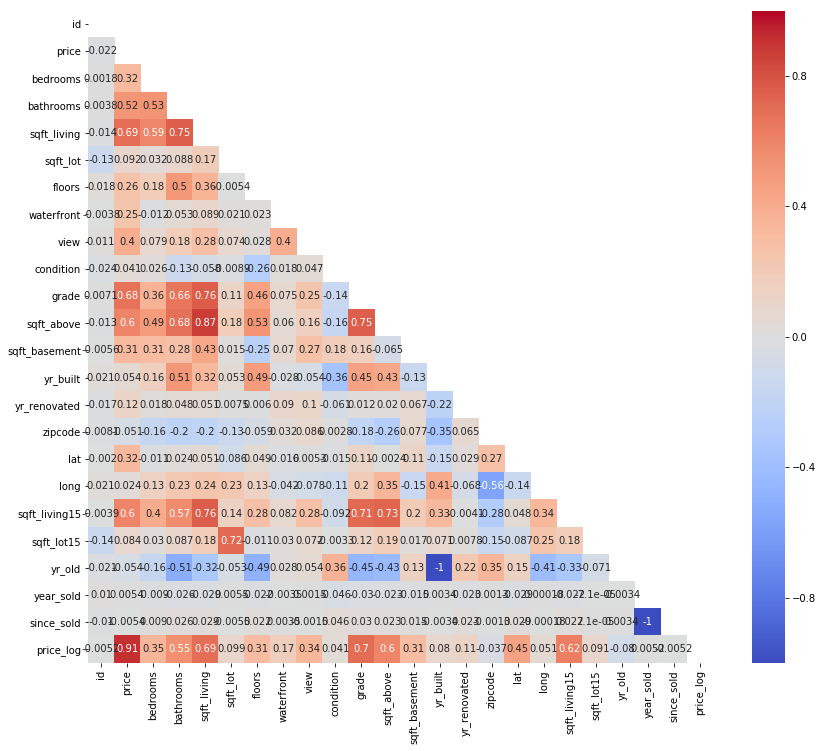

In [17]:
correlation = df.corr()
plt.figure(figsize=(14,12))
mask=np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
heatmap = sns.heatmap(correlation, annot=True, mask=mask, 
                      linewidths=0, vmin=-1, cmap="coolwarm")

In [21]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
price_log        0.910283
sqft_living      0.694332
grade            0.677461
sqft_above       0.598753
sqft_living15    0.597792
bathrooms        0.520003
view             0.397511
lat              0.320394
bedrooms         0.317871
sqft_basement    0.312569
floors           0.264089
waterfront       0.248897
yr_renovated     0.123536
sqft_lot         0.091994
sqft_lot15       0.084420
yr_built         0.054103
condition        0.040820
long             0.024028
year_sold        0.005384
since_sold      -0.005384
id              -0.022266
zipcode         -0.051128
yr_old          -0.054103
Name: price, dtype: float64

## Feature 1: Distance from City Center

In [22]:
# I decided to derive a variable called distance
# from an arbitrary center point of wealth, the "epicenter," 
# which is calculated using the Haversine Formula below

from numpy import sin, cos, sqrt, arctan2, radians, arcsin

# approximate radius of earth in km. Use 3956 for miles
R = 6373.0

# Should think of a more exact or precise way to 
# find the epicenter

lat1 = radians(df['lat'])
lon1 = radians(df['long'])
lat2 = radians(47.6224)
lon2 = radians(-122.215)

dlon = lon2 - lon1
dlat = lat2 - lat1

a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * arctan2(sqrt(a), sqrt(1 - a))

distance = R * c

In [24]:
## Adding the data to my dataframe
df['distance_km'] = distance
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old,year_sold,since_sold,price_log,distance_km
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,62,2014,3,12.309982,12.764087
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,66,2014,3,13.195614,13.452068
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,84,2015,2,12.100712,12.917570
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,52,2014,3,13.311329,17.496837
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,30,2015,2,13.142166,12.760863


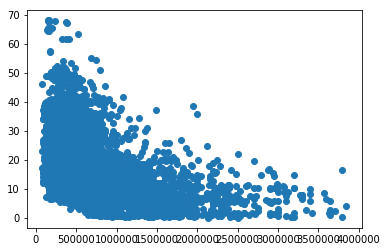

In [158]:
plt.scatter(df.price, df.distance_km);

In [159]:
def x_coord(x, y):
    
    lat = x
    lon = y
    
    r_major = 6378137.000
    x = r_major * np.radians(lon)
    scale = x/lon
    y = 180.0/np.pi * np.log(np.tan(np.pi/4.0 + 
        lat * (np.pi/180.0)/2.0)) * scale
    return (x, y)

In [162]:
df['mercator_x'], df['mercator_y'] = x_coord(df.lat, df.long)

In [163]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old,year_sold,since_sold,price_log,distance_km,month,gradeweight,Was_Renovated,Sqft_per_Fl,mercator_x,mercator_y
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,62,2014,3,12.309982,12.764087,10,low_grade,NaN,1180.0,-1.360959e+07,6.025918e+06
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,66,2014,3,13.195614,13.452068,12,low_grade,renovated,1285.0,-1.361649e+07,6.060564e+06
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,84,2015,2,12.100712,12.917570,2,low_grade,NaN,770.0,-1.360692e+07,6.063361e+06
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,52,2014,3,13.311329,17.496837,12,low_grade,NaN,1960.0,-1.362473e+07,6.027500e+06
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,30,2015,2,13.142166,12.760863,2,low_grade,NaN,1680.0,-1.358599e+07,6.043339e+06


In [164]:
from bokeh.plotting import figure, show, output_notebook, ColumnDataSource
from bokeh.tile_providers import CARTODBPOSITRON
from bokeh.models import ColorBar, Select
from bokeh.palettes import RdYlGn
from bokeh.transform import linear_cmap
from bokeh.layouts import row, column

In [166]:
#Establishes color palette and data source.
pal= RdYlGn[10]
source = ColumnDataSource(data=df)

#Establishes color mapper gradient, hover information, and slider widget.
mapper = linear_cmap(field_name = "price", palette = pal, low=min(df.price), high=max(df.price))
tooltips = [("Price","@price")]

#Defines scatter plot attributes and add map tile. Implement colors and data points.
fig = figure(x_axis_type = 'mercator', y_axis_type = 'mercator', tooltips = tooltips, title = 'King County Housing Prices')
fig.add_tile(CARTODBPOSITRON)
fig.circle(x = 'mercator_x', y = 'mercator_y', line_color = mapper,color=mapper, source=source)

#Defines color bar attributes and location
color_bar = ColorBar(color_mapper=mapper['transform'], width=8, location=(0,0))
fig.add_layout(color_bar, 'right')

#Defines layout of graph and widgets
layout = column(fig)

#Calls figure
show(layout)

## Feature 2: High Grade / Low Grade

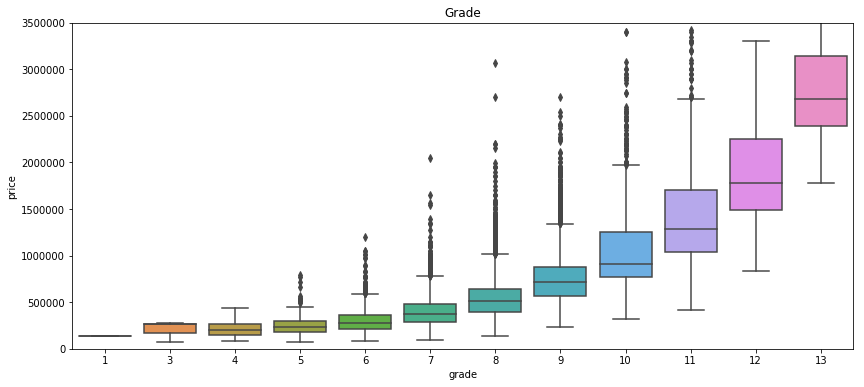

In [72]:
var = 'grade'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=data)
ax.set_title('Grade')
fig.axis(ymin=0, ymax=3500000);

In [206]:
df['gradeweight'] = pd.cut(df.grade,
                     bins=[0, 9, 13],
                     labels=[0, 1])

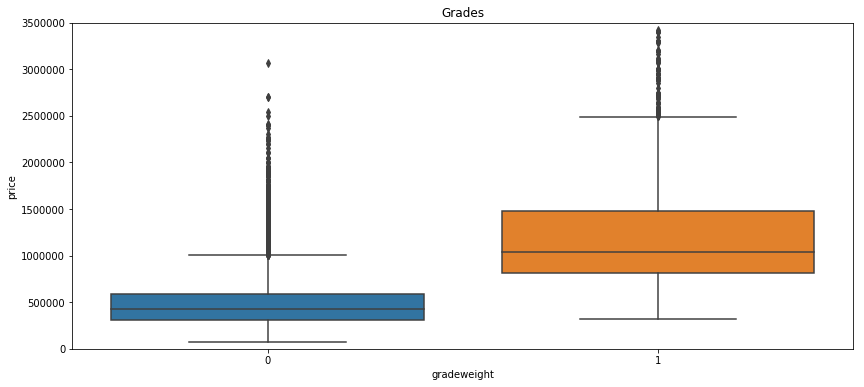

In [173]:
var = 'gradeweight'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=data)
ax.set_title('Grades')
fig.axis(ymin=0, ymax=3500000);

## Feature 3: Renovated / Not Renovated

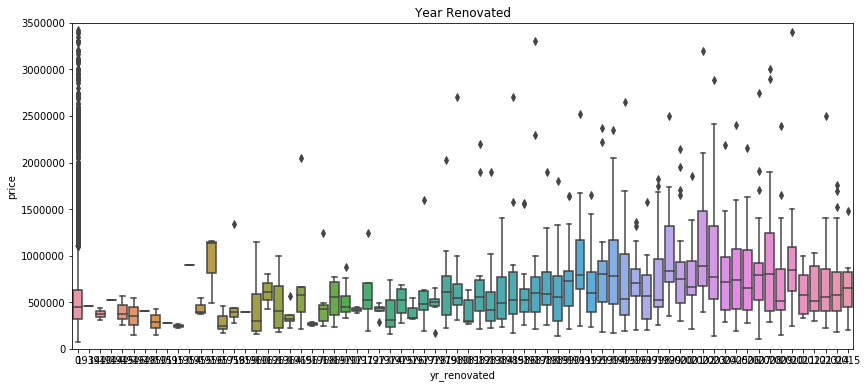

In [113]:
var = 'yr_renovated'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=data)
ax.set_title('Year Renovated')
fig.axis(ymin=0, ymax=3500000);

In [114]:
set(df['yr_renovated'])

{0,
 1934,
 1940,
 1944,
 1945,
 1946,
 1948,
 1950,
 1951,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1962,
 1963,
 1964,
 1965,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015}

In [180]:
df['Was_Renovated'] = pd.cut(df.yr_renovated,
                     bins=[-1, 1934, 2015],
                     labels=[0, 1])

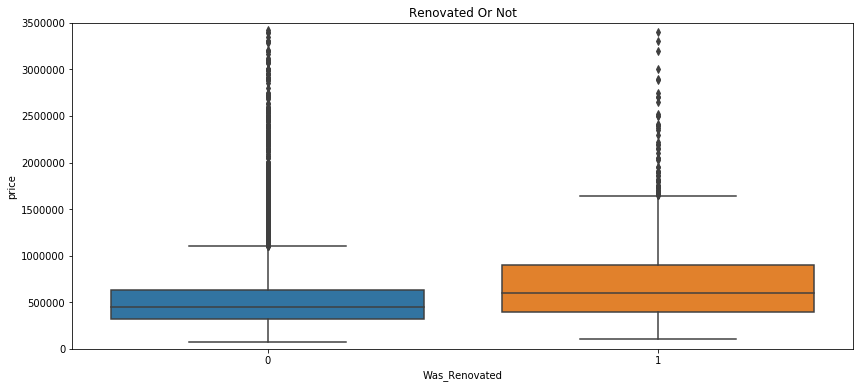

In [181]:
var = 'Was_Renovated'
data = pd.concat([df['price'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(14, 6))
fig = sns.boxplot(x=var, y="price", data=data)
ax.set_title('Renovated Or Not')
fig.axis(ymin=0, ymax=3500000);

## Feature 4: Sqft per Floor

In [154]:
df['Sqft_per_Fl'] = df.sqft_living / df.floors

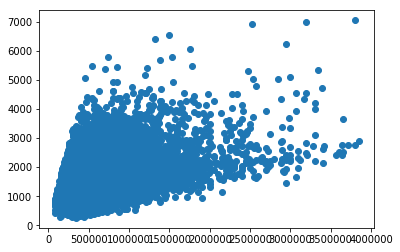

In [157]:
plt.scatter(df.price, df.Sqft_per_Fl);

## Baseline Model

In [186]:
df = df.round(2)
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old,year_sold,since_sold,price_log,distance_km,month,gradeweight,Was_Renovated,Sqft_per_Fl,mercator_x,mercator_y
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650,62,2014,3,12.31,12.76,10,0,0,1180.00,-13609586.99,6025917.78
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,66,2014,3,13.20,13.45,12,0,1,1285.00,-13616488.79,6060564.05
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062,84,2015,2,12.10,12.92,2,0,0,770.00,-13606915.32,6063360.97
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000,52,2014,3,13.31,17.50,12,0,0,1960.00,-13624726.44,6027500.09
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.62,-122.04,1800,7503,30,2015,2,13.14,12.76,2,0,0,1680.00,-13585987.25,6043339.14
5,7237550310,2014-05-12,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.66,-122.00,4760,101930,16,2014,3,14.02,16.18,5,1,0,5420.00,-13581534.47,6049831.64
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.31,-122.33,2238,6819,22,2014,3,12.46,35.79,6,0,0,857.50,-13617379.35,5992772.32
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.41,-122.32,1650,9711,54,2015,2,12.58,24.84,1,0,0,1060.00,-13616043.52,6009172.93
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.51,-122.34,1780,8113,57,2015,2,12.34,15.29,4,0,0,1780.00,-13618492.55,6026099.07
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.37,-122.03,2390,7570,14,2015,2,12.69,31.45,3,0,0,945.00,-13584428.78,6002415.01


In [216]:
df['gradeweight'] = df["gradeweight"].astype(float)

In [201]:
df['Was_Renovated'] = df['Was_Renovated'].astype(float)

In [209]:
x = df[['distance_km', 'gradeweight', 'Was_Renovated', 'Sqft_per_Fl']]
y = df['price']
regression = LinearRegression()
crossvalidation = KFold(n_splits=3, shuffle=True, random_state=1)

baseline = np.mean(cross_val_score(regression, x, y, scoring='r2', cv=crossvalidation))
baseline

0.5259957974086256

In [217]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
price_log        0.910331
sqft_living      0.694332
grade            0.677461
sqft_above       0.598753
sqft_living15    0.597792
gradeweight      0.565626
bathrooms        0.520003
Sqft_per_Fl      0.423186
view             0.397511
lat              0.320366
mercator_y       0.320146
bedrooms         0.317871
sqft_basement    0.312569
floors           0.264089
waterfront       0.248897
yr_renovated     0.123536
Was_Renovated    0.123298
sqft_lot         0.091994
sqft_lot15       0.084420
yr_built         0.054103
condition        0.040820
index            0.035654
long             0.024175
mercator_x       0.024028
year_sold        0.005384
since_sold      -0.005384
month           -0.012414
id              -0.022266
zipcode         -0.051128
yr_old          -0.054103
distance_km     -0.423733
Name: price, dtype: float64

In [220]:
df.columns

Index(['index', 'id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_old', 'year_sold',
       'since_sold', 'price_log', 'distance_km', 'month', 'gradeweight',
       'Was_Renovated', 'Sqft_per_Fl', 'mercator_x', 'mercator_y'],
      dtype='object')

In [234]:
feature_columns = ['distance_km', 'bathrooms', 'sqft_living', 'bedrooms', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'yr_old', 'year_sold',
       'since_sold', 'distance_km', 'month', 'gradeweight',
       'Was_Renovated', 'Sqft_per_Fl', 'mercator_x', 'mercator_y']
                   

In [263]:
len(feature_columns)

29

In [235]:
target = df['price']
features = df[feature_columns]

In [236]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=34,test_size=0.2)


In [237]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train =pd.DataFrame(data=scaler.transform(X_train), columns=feature_columns)
X_test =pd.DataFrame(data=scaler.transform(X_test), columns=feature_columns)

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


## Filter Method

In [238]:
# Create correlation matrix
corr_matrix = X_train.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

,distance_km,bathrooms,sqft_living,bedrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_old,year_sold,since_sold,distance_km,month,gradeweight,Was_Renovated,Sqft_per_Fl,mercator_x,mercator_y
distance_km,NaN,0.047885,0.086389,0.042419,0.174844,0.037086,0.002916,0.047011,0.042473,0.151361,0.004857,0.187419,0.221523,0.054625,0.248555,0.740601,0.283810,0.080038,0.190347,0.221523,0.020039,0.020039,1.000000,0.005655,0.122865,0.054505,0.077124,0.283825,0.740184
bathrooms,NaN,NaN,0.752420,0.530020,0.089223,0.507841,0.052506,0.186547,0.126874,0.662341,0.685542,0.273413,0.508137,0.046164,0.198083,0.026033,0.220186,0.563968,0.092670,0.508137,0.028800,0.028800,0.047885,0.011092,0.398325,0.045805,0.349587,0.219976,0.026078
sqft_living,NaN,NaN,NaN,0.592702,0.178578,0.361502,0.092429,0.284952,0.061098,0.762556,0.875341,0.430173,0.322107,0.051380,0.194849,0.054990,0.239865,0.754947,0.189113,0.322107,0.029598,0.029598,0.086389,0.013652,0.554893,0.051190,0.643367,0.239683,0.055027
bedrooms,NaN,NaN,NaN,NaN,0.036030,0.183029,0.010245,0.085818,0.023423,0.365484,0.489789,0.309162,0.161205,0.017572,0.153681,0.011041,0.130863,0.399293,0.033370,0.161205,0.011949,0.011949,0.042419,0.001469,0.196190,0.017381,0.431346,0.131030,0.011177
sqft_lot,NaN,NaN,NaN,NaN,NaN,0.001608,0.023191,0.073394,0.009503,0.114325,0.185518,0.022296,0.051398,0.007013,0.123756,0.077777,0.222126,0.146304,0.718256,0.051398,0.004591,0.004591,0.174844,0.000892,0.121700,0.007193,0.149349,0.222215,0.077549
floors,NaN,NaN,NaN,NaN,NaN,NaN,0.025368,0.028801,0.269161,0.461378,0.529248,0.241826,0.493261,0.000234,0.058898,0.051417,0.125624,0.282031,0.005808,0.493261,0.024343,0.024343,0.037086,0.015623,0.223597,0.000100,0.395649,0.125801,0.051537
waterfront,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400990,0.022451,0.077167,0.064328,0.070714,0.030767,0.087047,0.032633,0.015230,0.046039,0.082475,0.030899,0.030767,0.003295,0.003295,0.002916,0.008956,0.089765,0.087537,0.063396,0.046341,0.015121
view,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.047482,0.249859,0.163720,0.282606,0.052113,0.099837,0.086528,0.006773,0.077089,0.279992,0.071374,0.052113,0.001844,0.001844,0.047011,0.005683,0.209401,0.099340,0.259771,0.077316,0.006863
condition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.144915,0.159433,0.171538,0.363367,0.059033,0.001544,0.019358,0.107109,0.095566,0.004074,0.363367,0.042050,0.042050,0.042473,0.016569,0.077398,0.059269,0.154999,0.107274,0.019370
grade,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.753670,0.167138,0.444334,0.010819,0.178703,0.115383,0.195572,0.708733,0.120686,0.444334,0.032301,0.032301,0.151361,0.012031,0.658575,0.010794,0.367581,0.195274,0.115604


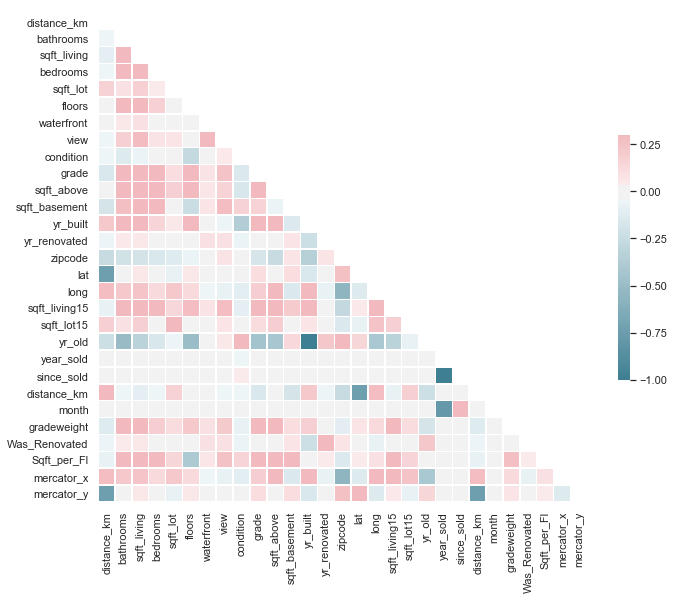

In [239]:
sns.set(style="white")


# Compute the correlation matrix
corr = X_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [240]:
len(X_train.columns)

29

In [241]:
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
X_train.drop(columns=to_drop, inplace=True)
X_test.drop(columns=to_drop, inplace=True)

In [242]:
len(X_train.columns)

22

## F Test

In [243]:
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

selector = SelectKBest(f_regression, k=10)

selector.fit(X_train, y_train)

SelectKBest(k=10, score_func=<function f_regression at 0x1a21b82bf8>)

In [244]:
selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]
# X_train = X_train[selected_columns]
# X_test = X_test[selected_columns]

In [245]:
list(removed_columns)

['bedrooms',
 'sqft_lot',
 'floors',
 'waterfront',
 'condition',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'long',
 'sqft_lot15',
 'year_sold',
 'month']

In [246]:
list(selected_columns)

['bathrooms',
 'sqft_living',
 'view',
 'grade',
 'sqft_above',
 'sqft_basement',
 'lat',
 'sqft_living15',
 'gradeweight',
 'Sqft_per_Fl']

## Recursive Feature Elimination

In [247]:
from sklearn.feature_selection import RFECV

In [252]:
ols = linear_model.LinearRegression()

In [253]:
# Create recursive feature eliminator that scores features by mean squared errors
selector = RFECV(estimator=ols, step=1, cv=5, scoring='neg_mean_squared_error')

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)


RFECV(cv=5,
   estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
   min_features_to_select=1, n_jobs=None, scoring='neg_mean_squared_error',
   step=1, verbose=0)

In [254]:
selected_columns = X_train.columns[selector.support_]
removed_columns = X_train.columns[~selector.support_]


In [255]:
list(removed_columns)

[]

In [256]:
len(list(selected_columns))

22

## Embedded Methods

In [257]:
X_train.head()

,bathrooms,sqft_living,bedrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month,gradeweight,Sqft_per_Fl
0,0.506207,0.094598,-0.403542,-0.116962,-0.910967,-0.087401,-0.304417,-0.633256,-0.560249,-0.517089,1.160748,0.234953,-0.210614,1.030775,1.231817,-0.825512,0.038034,-0.178546,1.447833,-0.826542,-0.283201,1.053625
1,-1.449362,-1.515471,-1.506721,-0.236225,-0.910967,-0.087401,-0.304417,0.901050,-2.271146,-1.321889,-0.660624,-0.617149,-0.210614,-0.407360,-0.425658,0.310971,-1.486741,-0.252125,1.447833,-0.826542,-0.283201,-1.216218
2,0.506207,0.006375,0.699638,-0.094139,-0.910967,-0.087401,-0.304417,2.435356,0.295199,0.360875,-0.660624,-0.583064,-0.210614,0.881359,1.087689,-0.541391,-0.870966,-0.175731,1.447833,-1.468762,-0.283201,0.929250
3,-1.449362,-1.294913,-1.506721,-0.226590,-0.910967,-0.087401,-0.304417,-0.633256,-0.560249,-1.078010,-0.660624,-0.821653,-0.210614,0.694588,0.943560,-0.541391,-1.046902,-0.262914,-0.690688,1.742338,-0.283201,-0.905280
4,-1.449362,-0.688381,-0.403542,-0.261948,-0.910967,-0.087401,1.000874,0.901050,0.295199,-1.017040,0.477733,-0.787569,-0.210614,0.750619,0.006727,-0.399331,-0.152562,-0.317476,-0.690688,-0.505432,-0.283201,-0.050202


In [259]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)

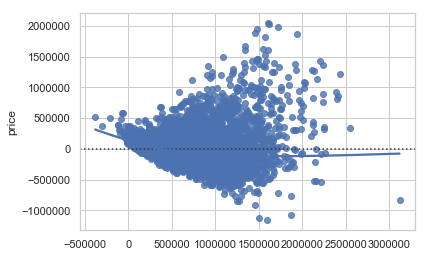

In [261]:
sns.residplot(y_train_pred, y_train, lowess=True, color="b")

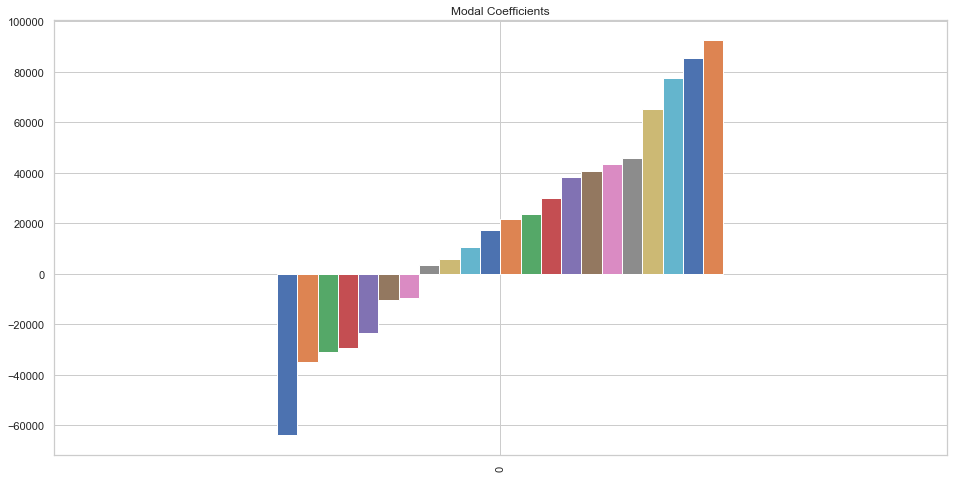

In [264]:
coef = pd.DataFrame(data=lm.coef_ ).T
coef.columns = selected_columns

model_coef = coef.T.sort_values(by=0).T
model_coef.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8),)

### Alpha as 0.01

In [265]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )


Training Error: 118548.32217078583
Testing Error: 185998.42837393208


/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


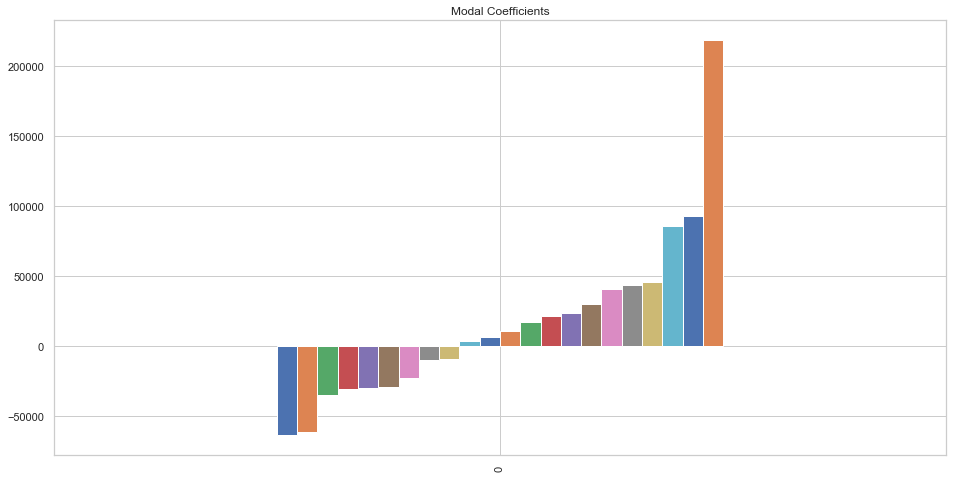

In [266]:
lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [267]:
lasso_coef01.T

,0
yr_built,-63999.125579
sqft_above,-61921.643225
Sqft_per_Fl,-34864.957682
zipcode,-30833.275333
sqft_basement,-29797.017190
long,-29572.453390
bedrooms,-23304.096516
floors,-10367.447854
sqft_lot15,-9477.718568
month,3407.191429


### Alpha as 0.05

Training Error: 118548.3063802171
Testing Error: 185998.42815507783


/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


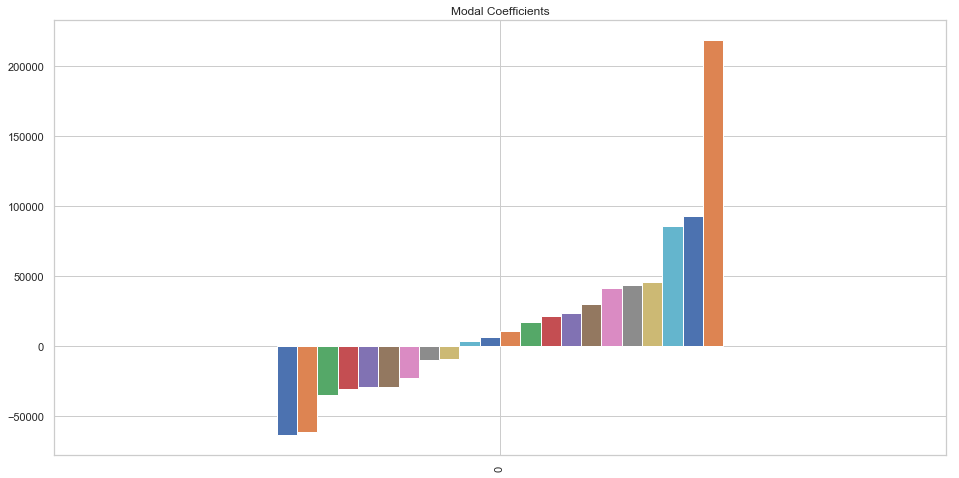

In [270]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.05, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )

lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [271]:
lasso_coef01.T

,0
yr_built,-63999.135465
sqft_above,-61837.705631
Sqft_per_Fl,-34864.565182
zipcode,-30833.174320
sqft_basement,-29752.050462
long,-29572.331009
bedrooms,-23303.972052
floors,-10367.036994
sqft_lot15,-9477.594801
month,3407.000713


### Alpha as 0.1

Training Error: 118548.28664200625
Testing Error: 185998.42788244673


/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


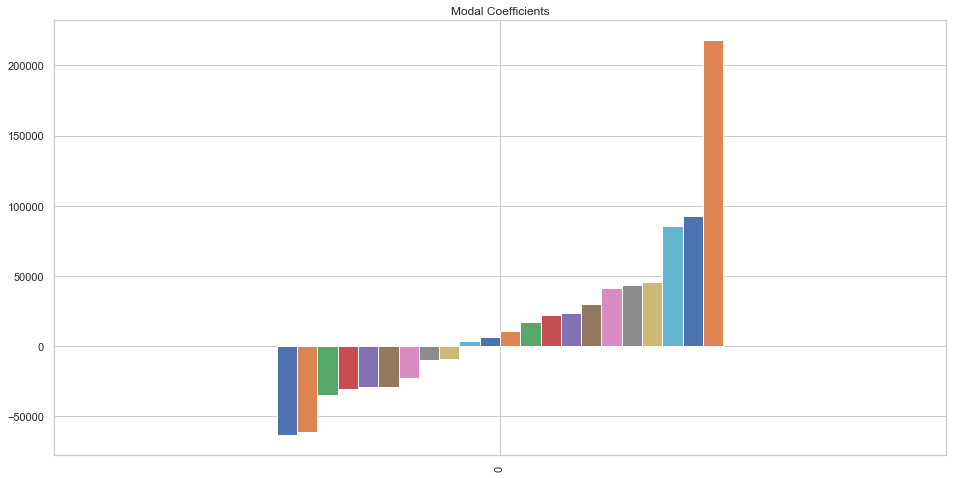

In [276]:
## training the model
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1, normalize=False)

lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = metrics.mean_absolute_error(y_train, y_train_pred)
test_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Training Error: '+ str(train_rmse) )
print('Testing Error: '+ str(test_rmse) )

lasso_coef01 = pd.DataFrame(data=lasso.coef_).T
lasso_coef01.columns = X_train.columns
lasso_coef01 = lasso_coef01.T.sort_values(by=0).T
lasso_coef01.plot(kind='bar', title='Modal Coefficients', legend=False, figsize=(16,8))

In [278]:
lasso_coef01.T

,0
yr_built,-63999.147824
sqft_above,-61732.783639
Sqft_per_Fl,-34864.074556
zipcode,-30833.048052
sqft_basement,-29695.842051
long,-29572.178032
bedrooms,-23303.816472
floors,-10366.523419
sqft_lot15,-9477.440093
month,3406.762317
